In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
#importing csv file
hazelnut = pd.read_csv(filepath_or_buffer  = "C:\MSc-Artificial Intelligence\Semester 1\Machine Learning\Assignments\hazelnut1.csv", sep = ',', header = None)

hazelnut.head()

,0,1,2,3,4,5,6,7,8,9,10
0,11.67,12.8025,8.055075,34.65,1375.50,0.93005,19.145,4.4604,0.048668,0.175,c_avellana
1,13.86,13.0995,7.349907,38.10,1439.55,0.93401,8.780,4.7844,0.048826,0.167,c_avellana
2,20.53,15.5925,9.565427,49.89,1623.30,0.96217,5.120,5.2893,0.049521,0.174,c_americana
3,14.13,12.2220,7.182949,35.43,1412.25,0.90178,13.694,4.8168,0.049595,0.167,c_avellana
4,15.85,14.7240,8.622661,43.29,1512.00,0.96261,10.925,4.6296,0.050384,0.173,c_americana


In [3]:
#seperating target & feature variables
X = hazelnut.iloc[:,:-1].values
y0 = hazelnut.iloc[:,-1].values

In [4]:
class LogisticRegression(object):
    def __init__(self, alpha=0.01, num_iter=10000):
            self.alpha = alpha
            self.num_iter = num_iter
            
    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig       #returns probabilities         

    
    def fit(self, X, y):
        self.num_attributes = X.shape[1]
        self.w = np.zeros((X.shape[1],))

        for i in range(self.num_iter):     
            z= np.dot(X,self.w)
            h = self.sigmoid(z)
            for j in range(self.num_attributes):           #number of columns in X
                self.w[j] = self.w[j] - self.alpha * np.sum((h - y) * X[:,j])     #gradient descent
                
        return self.w    #returns the best value for w
    
    def predict_prob(self, X, w):
        z1 = np.dot(X, w.T)
        return self.sigmoid(z1)   #returns value from sigmoid function
    
    def predict(self, X, w):
        h_pred = self.predict_prob(X, w)
        y_max = np.argmax(h_pred, axis = 1)   #gives the index value of maximum probability
        Predictions = []                      
        for i in y_max:                       #converts 0's, 1's to strings of class name
            if i == 0:
                Predictions.append("c_americana")
            elif i == 1:
                Predictions.append("c_avellana")
            elif i == 2:
                Predictions.append("c_cornuta")
        return Predictions                   #returns predicted values

Accuracy_10_fold = []
for i in range(10):  #splits data into 10 random divisions
    X_train, X_test, y_train, y_test = train_test_split(X, y0, test_size = 1/3, shuffle=True)  
    #splits train data into 67% and test data into 33%

    ss = StandardScaler() #normalize the data

    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)
    
    #one vs rest
    y1_train = np.where(y_train == 'c_americana', 1, 0)
    y2_train = np.where(y_train == 'c_avellana', 1, 0)
    y3_train = np.where(y_train == 'c_cornuta', 1, 0)

    weights = np.zeros((3,10))
    clf = LogisticRegression()

    weights[0] = clf.fit(X_train, y1_train)  #training for 3 classes
    weights[1] = clf.fit(X_train, y2_train)
    weights[2] = clf.fit(X_train, y3_train)

    y_pred = clf.predict(X_test, weights)   #predicting 
    Accuracy = accuracy_score(y_test, y_pred)  
    
    Accuracy_10_fold.append(Accuracy*100)  #compute accuracy score for each split
    
    print("Accuracy score of split ", i+1, ": ", Accuracy_10_fold[i])

Avg_Accuracy = np.mean(Accuracy_10_fold)  # returns mean of all the scores
print("\nAverage Accuracy score of model:", Avg_Accuracy)

Accuracy score of split  1 :  98.50746268656717
Accuracy score of split  2 :  95.52238805970148
Accuracy score of split  3 :  92.53731343283582
Accuracy score of split  4 :  94.02985074626866
Accuracy score of split  5 :  95.52238805970148
Accuracy score of split  6 :  97.01492537313433
Accuracy score of split  7 :  95.52238805970148
Accuracy score of split  8 :  97.01492537313433
Accuracy score of split  9 :  94.02985074626866
Accuracy score of split  10 :  97.01492537313433

Average Accuracy score of model: 95.67164179104478


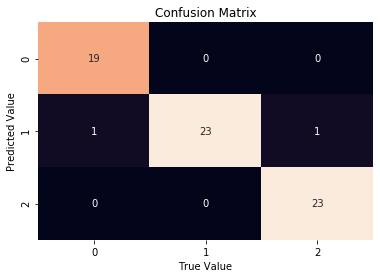

In [6]:
# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)

#heatmap
plot1 = sns.heatmap(matrix,annot=True,cbar=False)
plt.ylabel('Predicted Value')
plt.xlabel('True Value')
plt.title('Confusion Matrix')
plt.show()

In [7]:
# Reference logistic Regression to compare model

from sklearn.linear_model import LogisticRegression

ref = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y0)
ref.predict(X)
X = ss.fit_transform(X)
for i in range(10):
    scores = cross_val_score(ref, X, y0, cv=10) * 100
    print("Accuracy score of cross validation ", i+1, ": ", scores[i])
score1 = np.mean(scores)
print("\nAccuracy score of scikit learn model:", score1)

Accuracy score of cross validation  1 :  95.23809523809523
Accuracy score of cross validation  2 :  90.47619047619048
Accuracy score of cross validation  3 :  85.71428571428571
Accuracy score of cross validation  4 :  95.23809523809523
Accuracy score of cross validation  5 :  90.47619047619048
Accuracy score of cross validation  6 :  95.0
Accuracy score of cross validation  7 :  89.47368421052632
Accuracy score of cross validation  8 :  100.0
Accuracy score of cross validation  9 :  100.0
Accuracy score of cross validation  10 :  89.47368421052632

Accuracy score of scikit learn model: 93.10902255639097


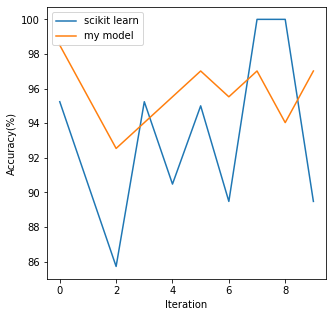

In [8]:
#learning curve
plt.figure(figsize=(5,5))
plt.plot(range(10), scores, label = 'scikit learn')
plt.plot(range(10), Accuracy_10_fold, label = 'my model')
plt.ylabel('Accuracy(%)')
plt.xlabel('Iteration')
plt.legend()
plt.show()

In [9]:
#writing to csv

predictions = list()
for i in range(len(y_pred)):
    predictions.append([y_test[i], y_pred[i], "True" if y_pred[i] == y_test[i] else "False"])
    Predict = pd.DataFrame(predictions, columns=["True Value", "Predicted Value", "Output"])

Predict.to_csv('LogisticRegression.csv', header=True, index=False)